# STOR 320: Introduction to Data Science
## Lab 10

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

Diabetes dataset:

- age: This feature represents the normalized age of the patient. The values are scaled and centered around the mean, which means they don't represent actual ages but rather relative differences.

- sex: The normalized gender information of the patient. Like the age feature, this is a numerical value that has been scaled and centered.

- bmi: The Body Mass Index (BMI) of the patient, which is a measure of body fat based on weight and height. This feature is also normalized and centered.

- bp: The average blood pressure of the patient. It has been measured and normalized to represent a scaled version, not an absolute pressure in mmHg.

- s1: This is a measure related to serum cholesterol levels. The value is normalized and represents the blood serum measurement, not an actual cholesterol count.

- s2: A measure related to low-density lipoproteins (LDL), another cholesterol-related measure, which is scaled and centered.

- s3: This feature is related to high-density lipoproteins (HDL), known as "good" cholesterol. Again, it is a normalized measure.

- s4: This column represents the level of serum triglycerides, a type of fat (lipid) in the blood. The value is scaled and normalized.

- s5: A measure related to the level of serum insulin, normalized and centered to represent relative differences between patients.

- s6: A measure related to the blood sugar level (glucose). The feature is scaled and centered, like the other measurements.

- target: The response variable, representing the progression of diabetes one year after the baseline measurements. This is a continuous value indicating how much the disease has progressed.

In [2]:
# Load the dataset
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

In [3]:
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

# Add the target variable to the DataFrame
df['target'] = diabetes.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


1. Present 10 scatter plots between target and each of the feature columns

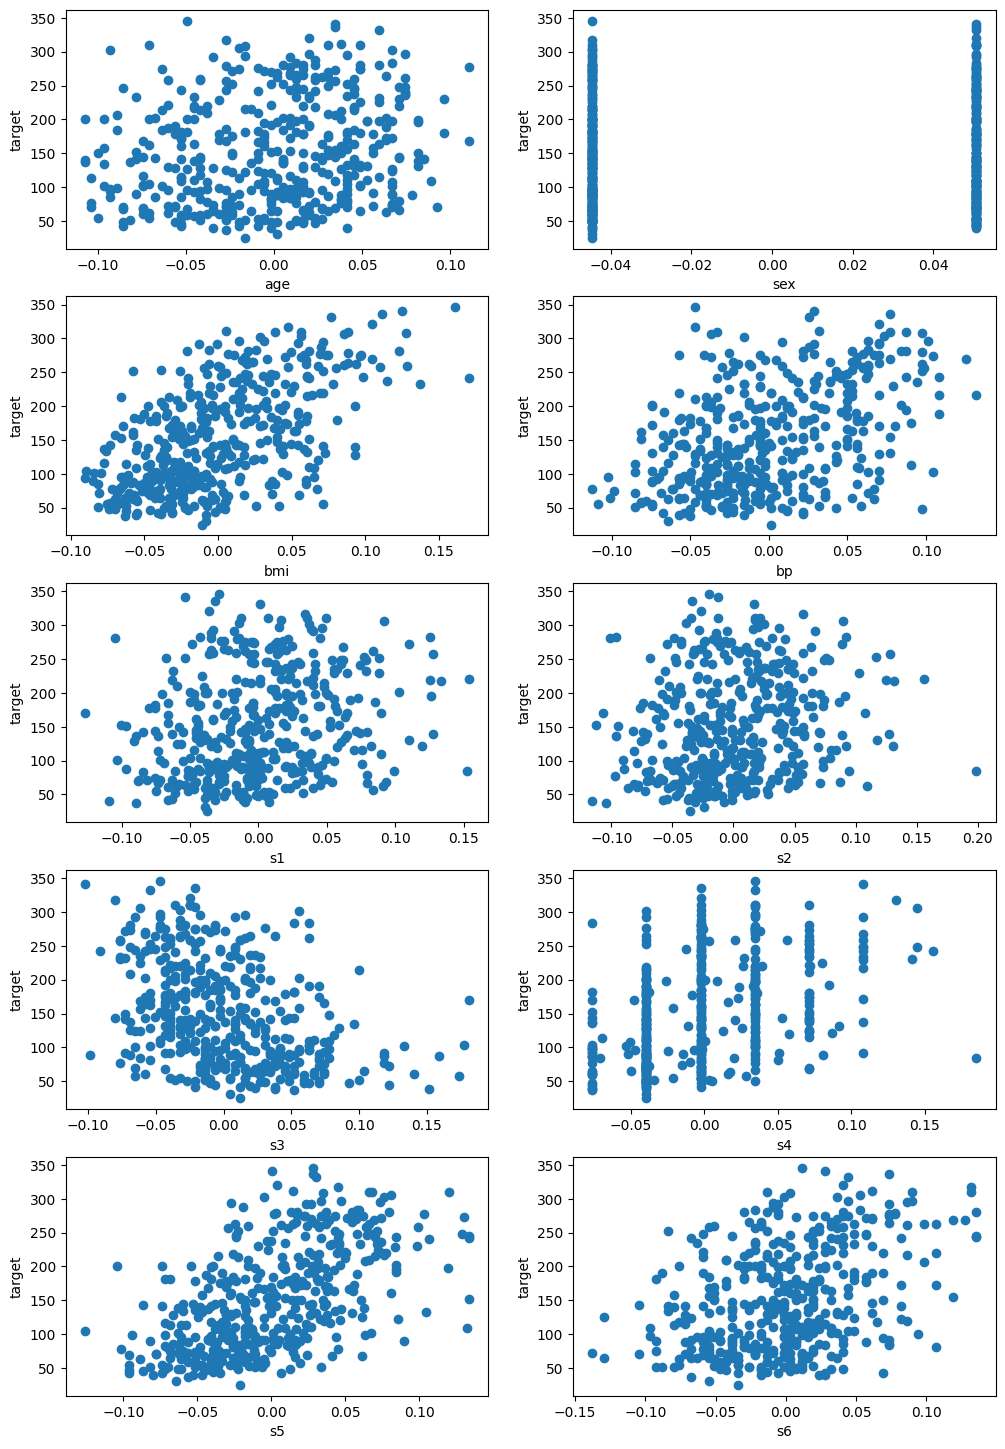

In [7]:

fig, axes = plt.subplots(5, 2, figsize=(12, 18))

# Iterate over feature columns and plot scatter plots
for i, ax in enumerate(axes.flatten()):
    feature = df.columns[i]
    ax.scatter(df[feature], df['target'])
    ax.set_xlabel(feature)
    ax.set_ylabel('target')

plt.show()


2. Present the pair plot to check correlations. Do you find any correlation?

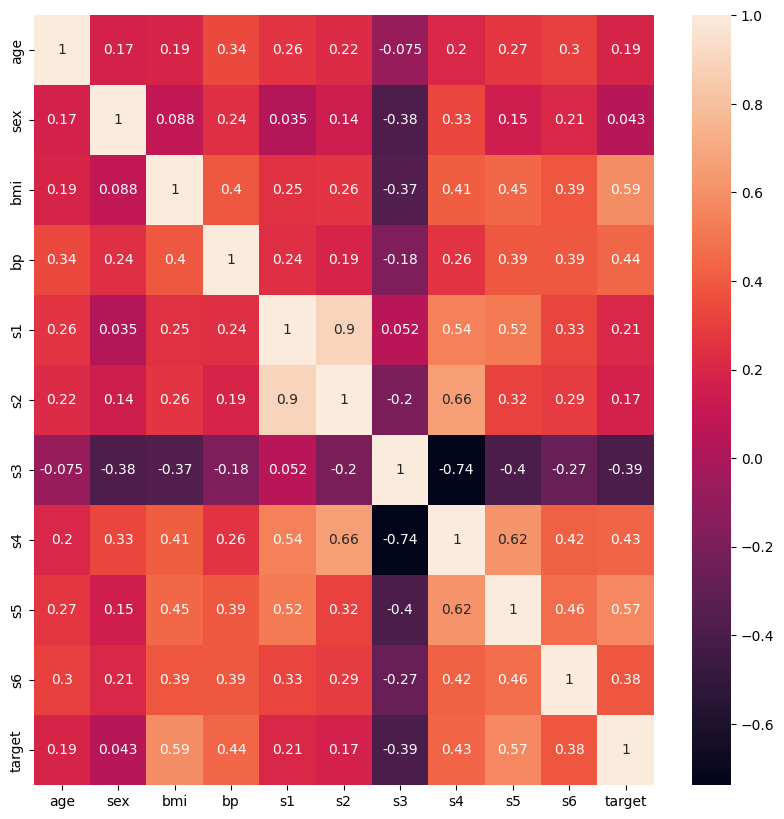

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

`s3` seems to be correlated in some way with all other factors, especially `s4`.

3. Split the data (`X` and `y`) into a training set (80%) and a test set (20%) 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4. For both training and testing dataset, add second-order features and their interactions.

Hint: you can use `PolynomialFeatures`.

In [72]:
degree = PolynomialFeatures(degree=2)

X_train_poly = degree.fit_transform(X_train)
X_test_poly = degree.fit_transform(X_test)

5. Build a linear regression model using all the features including the second order term and interaction term. Calculate the R2 and OSR2.

In [73]:
def OSR2(y_train, y_test, y_pred):
    
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)

In [74]:
X_train_poly = sm.add_constant(X_train_poly)
model1 = sm.OLS(y_train, X_train_poly).fit() 
y_pred_train = model1.predict(X_train_poly)
y_pred_test = model1.predict(X_test_poly)

print(f"R2 for training set: {OSR2(y_train, y_train, y_pred_train)}")
print(f"OSR2 for test set: {OSR2(y_train, y_test, y_pred_test)}")

R2 for training set: 0.6061583502354679
OSR2 for test set: 0.42254798332640486


6. Build a PCR model. Set the number of PC as 6. Calculate R2 and OSR2. Is OSR2 better than the linear regression?

In [95]:
scaler = StandardScaler()
pca = PCA(random_state=88)
lr = LinearRegression()
pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('lr', lr)])
pipe.set_params(pca__n_components=6)
pipe.fit(X_train_poly, y_train)

y_pred_train = pipe.predict(X_train_poly)
y_pred_test = pipe.predict(X_test_poly)

In [94]:
print(f"R2 = {OSR2(y_train, y_train, y_pred_train)}")
print(f"OSR2 = {OSR2(y_train, y_test, y_pred_test)}")

R2 = 0.3215596900597456
OSR2 = 0.31448386917472626


7. Build a Ridge model. Set the regularization parameter as 0.1. Calculate R2 and OSR2. Is OSR2 better than the linear regression?

In [84]:
rr = Ridge(alpha=0.1, random_state=88)
model1 = rr.fit(X_train, y_train)

y_pred_train = model1.predict(X_train_poly)
y_pred_test = model1.predict(X_test_poly)

print(f"R2 for training set: {OSR2(y_train, y_train, y_pred_train)}")
print(f"OSR2 for test set: {OSR2(y_train, y_test, y_pred_test)}")

ValueError: X has 66 features, but Ridge is expecting 10 features as input.

8. Build a Lasso model. Set the regularization parameter as 0.1. Calculate R2 and OSR2. Is OSR2 better than the linear regression?